<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

<h1>Welcome to Colaboratory!</h1>
Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_excel("assignment_modelling (1).xlsx")
df1=pd.read_excel("test set.xlsx")


In [0]:
df.shape #shape of training set

(10000, 10)

In [0]:
df1.shape #shape of test set

(4999, 9)

In [0]:
df['Success/not success']=df['Success/not success'].astype('category').cat.codes #Converting to numerical

In [0]:
df['Domain']=df['Domain'].astype('category').cat.codes #Converting to numerical 

In [0]:
df['Productivity']=df['Productivity'].astype('category').cat.codes #Converting to numerical

In [0]:
X=df[['Last_evaluation', 'Number_project', 'Average_montly_hours',
       'Time_spend', 'Work_accident', 'Bonus_in_last_5years',
       'Satisfaction_level', 'Domain', 'Productivity']]
y=df['Success/not success']


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0) #splitting the data into train and test


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
df1['Domain']=df1['Domain'].astype('category').cat.codes #Converting to numerical

In [0]:
df1['Productivity']=df1['Productivity'].astype('category').cat.codes #Converting to numerical

In [0]:
Xt=df1[['Last_evaluation', 'Number_project', 'Average_montly_hours',
       'Time_spend', 'Work_accident', 'Bonus_in_last_5years',
       'Satisfaction_level', 'Domain', 'Productivity']]


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression  #linear regression
regressor = LinearRegression()  
k=regressor.fit(X_train, y_train)
#y_pred=regressor.predict(X_test)

model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 264,  109],
       [  18, 1609]])

In [0]:
model.score(X_test, y_test) #accuracy on test split of training data

0.9365

In [0]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X_train, y_train, cv=10))

[0.93632959 0.91885144 0.92384519 0.915      0.92875    0.9125
 0.9225     0.91489362 0.93366708 0.92866083]


In [0]:
from pprint import pprint
from sklearn.model_selection import GridSearchCV

# hyperparameters in model that needs to be tuned
parameters = {'n_estimators': [20, 50, 100, 200], 
              'max_depth': [2, 5, 8, 10],
              'criterion': ['gini', 'entropy']}

clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, parameters, cv=10, n_jobs=-1, verbose=1)
print("Performing grid search...")
print("parameters:")
pprint(parameters)
grid_search.fit(X_train, y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

Performing grid search...
parameters:
{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 5, 8, 10],
 'n_estimators': [20, 50, 100, 200]}
Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min


Best score: 0.981
Best parameters set:
	criterion: 'gini'
	max_depth: 10
	n_estimators: 20


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.9min finished


In [0]:
import numpy as np

# This is your chosen model. Predict values using this model.predict(X_test)    
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)

y_tes=final_model.predict(Xt)


In [0]:
df2=pd.DataFrame(y_tes,columns=['Predicted Success/not success'])
df2['Predicted Success/not success']=np.where(df2['Predicted Success/not success']==1, 'Success', 'Not Success')
df1.join(df2)
#Displays the predicted classes for the test data set


,Last_evaluation,Number_project,Average_montly_hours,Time_spend,Work_accident,Bonus_in_last_5years,Satisfaction_level,Domain,Productivity,Predicted Success/not success
0,0.49,4,255,2,0,0,0.93,5,0,Success
1,0.61,3,213,6,0,0,0.27,4,1,Success
2,0.63,4,173,3,0,0,0.90,2,2,Success
3,0.70,6,246,4,0,0,0.16,8,2,Success
4,0.63,3,148,4,0,0,0.75,9,2,Success
5,0.74,2,238,3,0,0,0.72,5,2,Success
6,0.51,3,185,3,0,0,0.68,6,2,Success
7,0.77,4,201,5,0,0,0.13,6,2,Success
8,0.92,3,150,2,0,0,0.96,6,2,Success
9,0.72,4,137,3,0,0,0.71,4,2,Success


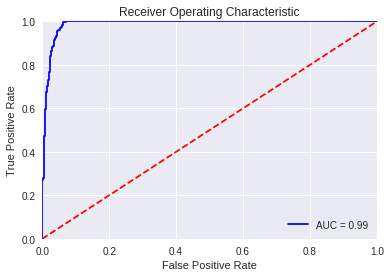

In [0]:
from sklearn import metrics

probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Getting Started
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Loading and saving data: Local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Using Google Cloud BigQuery](/notebooks/bigquery.ipynb)
- [Forms](/notebooks/forms.ipynb), [Charts](/notebooks/charts.ipynb), [Markdown](/notebooks/markdown_guide.ipynb), & [Widgets](/notebooks/widgets.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [TensorFlow with TPU](/notebooks/tpu.ipynb)
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/): [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb) & [First Steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [0]:
import tensorflow as tf

input1 = tf.ones((2, 3))
input2 = tf.reshape(tf.range(1, 7, dtype=tf.float32), (2, 3))
output = input1 + input2

with tf.Session():
  result = output.eval()
result  

array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)

### GitHub

For a full discussion of interactions between Colab and GitHub, see [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb). As a brief summary:

To save a copy of your Colab notebook to Github, select *File → Save a copy to GitHub…*

To load a specific notebook from github, append the github path to http://colab.research.google.com/github/.
For example to load this notebook in Colab: [https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb) use the following Colab URL: [https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb)

To open a github notebook in one click, we recommend installing the [Open in Colab Chrome Extension](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo).



### Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

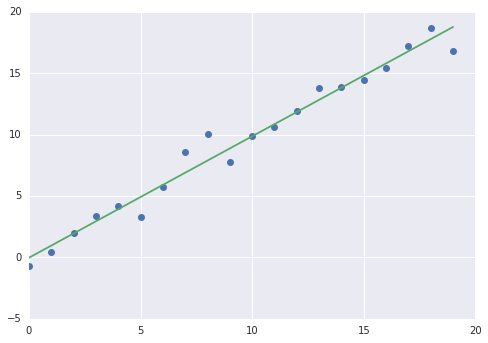

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it at the top of the notebook. Then that library can be used anywhere else in the notebook. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb).

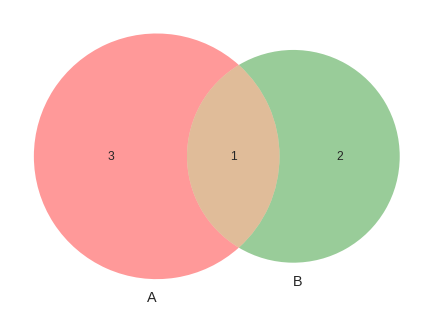

In [0]:
!pip install -q matplotlib-venn

from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

### Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


### Local runtime support

Colab  supports connecting to a Jupyter runtime on your local machine. For more information, see our [documentation](https://research.google.com/colaboratory/local-runtimes.html).